# Technical Exercise for Data Scientist Candidates

Importing libraries required

In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import datetime as dt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

Importing BeerDataScienceProject file -the data to work upon

In [4]:
os.chdir(r'C:\Users\eatthim\Documents\basic_docs\to_share\evo\BeerDataScienceProject')

In [ ]:
df=pd.read_csv('BeerDataScienceProject.csv',encoding='iso-8859-1')

# Basic exploration

In [9]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [11]:
df.shape

(528870, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [20]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [344]:
print(len(df['beer_name'].unique()), len(df['beer_brewerId'].unique()), len(df['beer_style'].unique()))

18339 1803 104


Text(0, 0.5, 'Number of Reviews')

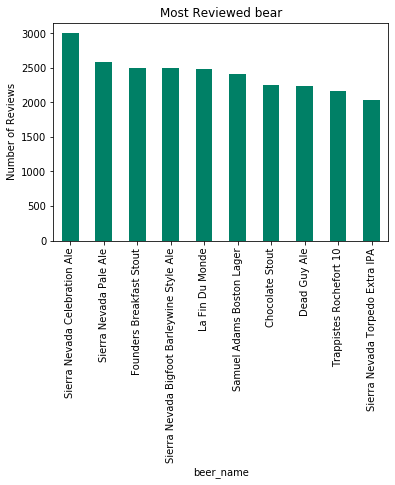

In [16]:
# Most Reveiwed beer_name


plot3 = df.groupby('beer_name')['beer_brewerId'].count().nlargest(10).plot(kind='bar', \
               title='Most Reviewed bear', \
               colormap='summer',  )

plot3.set_ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

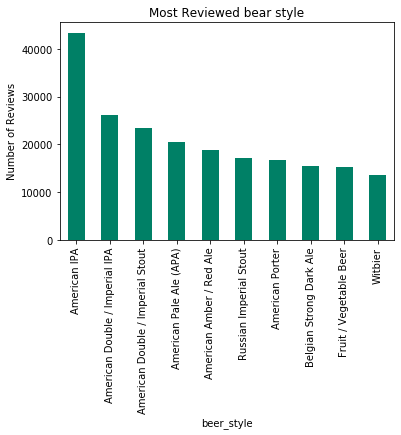

In [19]:
# Most Reveiwed beer_style


plot3 = df.groupby('beer_style')['beer_brewerId'].count().nlargest(10).plot(kind='bar', \
               title='Most Reviewed bear style', \
               colormap='summer',  )

plot3.set_ylabel('Number of Reviews')

In [27]:
data_bear_name_reviews=df.groupby(['beer_name'],as_index=False).agg({"beer_brewerId":'count'})
data_bear_name_reviews.columns=['beer_name','Reviews']

In [25]:
data_bear_name_reviews.head()

,beer_name,beer_brewerId
0,"""100"" Pale Ale",1
1,"""33"" Export",3
2,"""76"" Anniversary Ale",3
3,"""76"" Anniversary Ale With English Hops",1
4,"""Fade To Black"" Porter",1


# qsn--> 1.	Rank top 3 Breweries which produce the strongest beers?

Alcohol by Volume (ABV) A measurement of the alcohol content. We will be using this as a metric to decide which breweries produce the strongest beers.

In [30]:
df[['beer_name','beer_brewerId','beer_style','beer_ABV']].isnull().sum()

beer_name            0
beer_brewerId        0
beer_style           0
beer_ABV         20280
dtype: int64

In [304]:
(20280/528870)*100

3.834590731181576

Removing the 3.8% of the review data where the ABV information is not available. It will not impact much on the analysis.

In [84]:
df.shape

(528870, 13)

In [83]:
data_1=df[~df['beer_ABV'].isnull()][['beer_name','beer_brewerId','beer_style','beer_ABV']].drop_duplicates()

In [85]:
data_1.shape

(14990, 4)

General distribution of ABV looks like below--
We can see that majority of the beers have <10% ABV

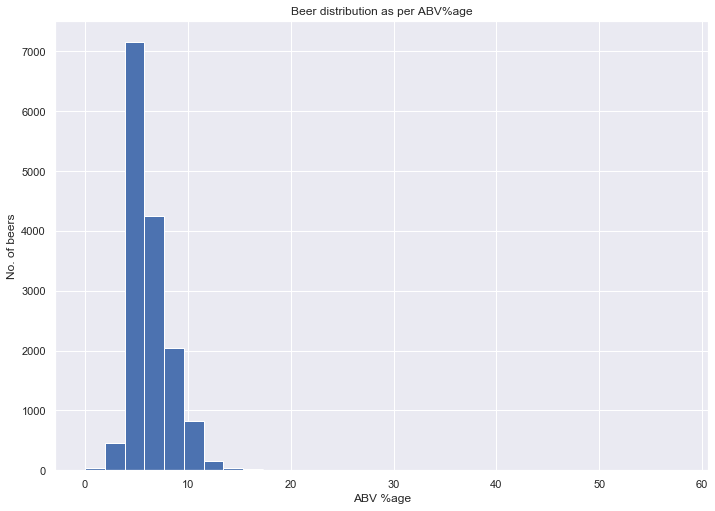

In [309]:
plt.hist(data_1['beer_ABV'],bins=30)
plt.title('Beer distribution as per ABV%age')
plt.ylabel('No. of beers')
plt.xlabel('ABV %age')
plt.show()

  

Checking on an average level, a Brewer produces how many beers.
-- We can see on an average, a brewery produces ~10 beers and median is ~5 beers. 
-- We will be considering breweries who produces more than 5 beers for our required analysis.

In [90]:
brewery_beer_count=data_1.groupby(['beer_brewerId'],as_index=False).agg({'beer_name':'count'})
brewery_beer_count.columns=['beer_brewerId','beer_counts']

print(brewery_beer_count['beer_counts'].mean(),brewery_beer_count['beer_counts'].median())

9.327940261356565 5.0


In [91]:
# Considering breweries that make 5 beers or more
brewery_list=list(brewery_beer_count[brewery_beer_count['beer_counts']>=5]['beer_brewerId'].unique())

In [92]:
data_1.dtypes

beer_name         object
beer_brewerId      int64
beer_style        object
beer_ABV         float64
dtype: object

In [100]:
brewer_to_consider=data_1[data_1['beer_brewerId'].isin(brewery_list)]

From the below table we can see the top 5 breweries which produces strongest beer as per average of ABV%age found in beers produced by them.

In [115]:
data_plot_mean=brewer_to_consider.groupby('beer_brewerId',as_index=False).agg({'beer_ABV':'mean'}).nlargest(5,'beer_ABV')
data_plot_mean

,beer_brewerId,beer_ABV
449,6513,24.690000
60,396,10.165769
739,22202,9.675000
147,881,9.633333
320,2958,9.250333


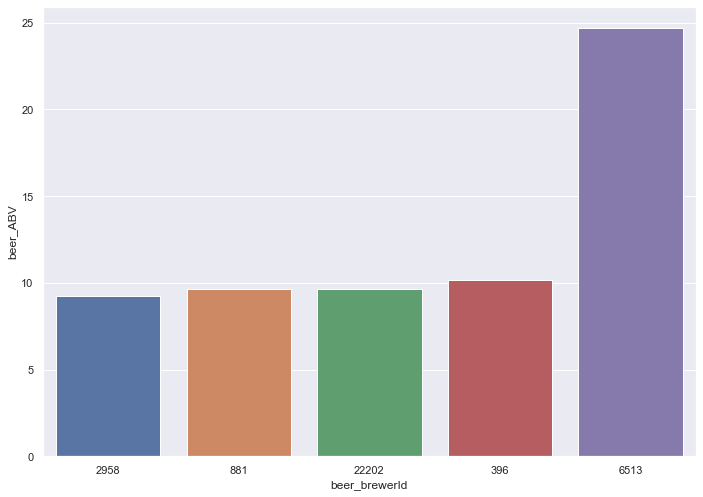

In [331]:
import seaborn as sns
data_plot_mean['beer_brewerId']=data_plot_mean['beer_brewerId'].astype('str')

sns.barplot(x = 'beer_brewerId',
            y = 'beer_ABV',
            data = data_plot_mean,
           order=data_plot_mean.sort_values('beer_ABV').beer_brewerId)
 
# Show the plot
plt.show()

From the below table we can see the top 5 breweries which produces strongest beer as per median of ABV%age found in beers produced by them.

In [116]:
data_plot_median=brewer_to_consider.groupby('beer_brewerId',as_index=False).agg({'beer_ABV':'median'}).nlargest(5,'beer_ABV')
data_plot_median

,beer_brewerId,beer_ABV
449,6513,16.0
60,396,11.0
341,3392,9.2
353,3567,9.2
105,681,9.0


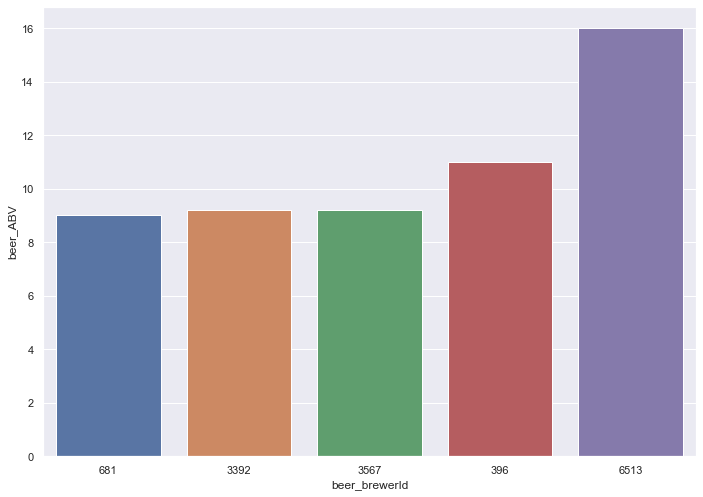

In [332]:

data_plot_median['beer_brewerId']=data_plot_median['beer_brewerId'].astype('str')

sns.barplot(x = 'beer_brewerId',
            y = 'beer_ABV',
            data = data_plot_median,
           order=data_plot_median.sort_values('beer_ABV').beer_brewerId)
 
# Show the plot
plt.show()

Another way check what %age of beers fall above a particular ABV% threshold for breweries

Taking 9% as benchmark for now, as from above we can see the median or the average ABV%age for top 5 breweries and lowest is 9%

So we will try to see that among the breweries, if they produce N beers (we have already filtered out the breweries which are producing more than 4 beers) how many are above 9% ABV benchmarking.

In [119]:
brewer_to_consider['Benchmark_Indicator']=np.where(brewer_to_consider['beer_ABV']>9,1,0)
data_brewer_prcnt_beer_ABV=brewer_to_consider.groupby(['beer_brewerId'],as_index=False).agg({"Benchmark_Indicator":'sum',"beer_ABV":'count'})
data_brewer_prcnt_beer_ABV.columns=['beer_brewerId','Above_Benchmark_Beer','Total_Beer']
data_brewer_prcnt_beer_ABV['%beer_above_benchmark']=100*(data_brewer_prcnt_beer_ABV['Above_Benchmark_Beer']/data_brewer_prcnt_beer_ABV['Total_Beer'])
data_brewer_prcnt_beer_ABV.sort_values('%beer_above_benchmark',ascending=False).head(5)


,beer_brewerId,Above_Benchmark_Beer,Total_Beer,%beer_above_benchmark
449,6513,9,10,90.000000
60,396,40,52,76.923077
353,3567,5,9,55.555556
341,3392,5,9,55.555556
139,823,5,10,50.000000


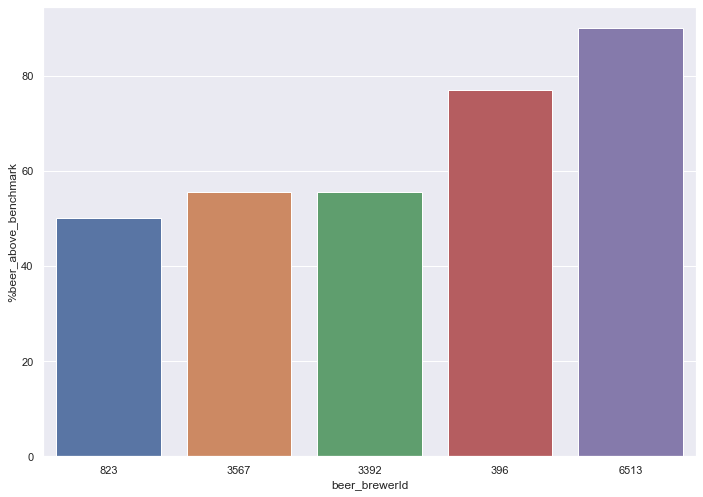

In [333]:
import seaborn as sns
data_brewer_prcnt_beer_ABV['beer_brewerId']=data_brewer_prcnt_beer_ABV['beer_brewerId'].astype('str')
data_to_consider=data_brewer_prcnt_beer_ABV.sort_values('%beer_above_benchmark',ascending=False).head(5)

sns.barplot(x = 'beer_brewerId',
            y = '%beer_above_benchmark',
            data = data_to_consider,
           order=data_to_consider.sort_values('%beer_above_benchmark').beer_brewerId)
 
# Show the plot
plt.show()

Consolidating every approach
1. Brewer_id 6513 --Avg ABV 24% --Med ABV 16% --90% beers they make are above our benchmark 9% ABV
2. Brewer_id 396 --Avg ABV 10% --Med ABV 11% -- 76% beers they make are above our benchmark 9% ABV
3. Brewer_id 3392 --Avg ABV 10% --Med ABV 9% -- 55% beers they make are above our benchmark 9% ABV


# 2.	Which year did beers enjoy the highest ratings? 

In [120]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


Converting Unix Time Stamp to proper readable date format

In [128]:
df['Review_datetime']=df['review_time'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%d/%m/%Y %H:%M:%S'))

In [129]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Review_datetime
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,16/02/2009 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,01/03/2009 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,01/03/2009 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,15/02/2009 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,30/12/2010 18:53:26


In [134]:
df['Review_Year']=pd.to_datetime(df['Review_datetime'],format='%d/%m/%Y %H:%M:%S').dt.year

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 15 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
Review_datetime       528870 non-null object
Review_Year           528870 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 60.5+ MB


In [136]:
df['Review_Year'].isnull().sum()

0

In [137]:
df['Review_Year'].value_counts()

2011    110836
2010     93810
2009     83578
2008     69080
2007     46514
2006     43083
2005     29433
2004     22905
2003     18187
2002      7581
2012      3180
2001       602
2000        33
1999        25
1998        23
Name: Review_Year, dtype: int64

On the basis of above counts we could say that there is no point in considering any year less than 2002 as there were no significant reviews at that time.

(array([3.00000e+00, 7.28900e+03, 3.04700e+04, 1.52608e+05, 3.38500e+05]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

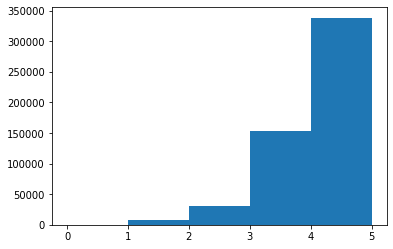

In [141]:
plt.hist(df['review_overall'],bins=5)

Average reviews per year per beer came out to be ~10

Taking into consideration those beers only which have reviews greater than 10 in a year

In [159]:
review_per_beer=df.groupby(['Review_Year','beer_name'],as_index=False).agg({'review_overall':'count'})
review_per_beer.columns=['Review_Year','beer_name','Reviews_count']
(review_per_beer['Reviews_count'].mean(),review_per_beer['Reviews_count'].median() )

(11.070247414911877, 2.0)

beers considered having more than 10 reviews

In [166]:
beers_above_10_reviews=list(review_per_beer[review_per_beer['Reviews_count']>=10]['beer_name'].unique())

beer_data_Above_10_reviews=df[df['beer_name'].isin(beers_above_10_reviews)]

beer_data_Above_10_reviews_grouped=beer_data_Above_10_reviews.groupby(['Review_Year','beer_name'],as_index=False).agg({"review_overall":"mean"})



From below plot we can see that-

Considering year greater than 2002 where significant reviews were available, 2012 is the year which is having good review overall as we can see from the median box plot spread.

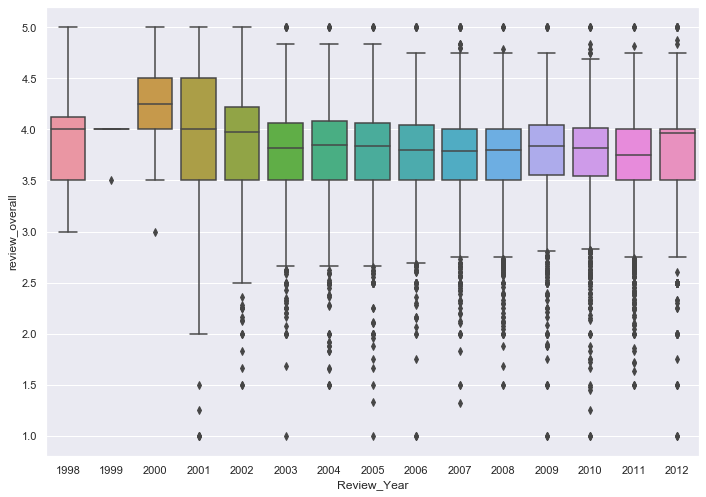

In [162]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(x="Review_Year", y="review_overall", data=beer_data_Above_10_reviews_grouped)

# 3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

Approach 1 -Staring with a correlation plot

In [173]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 5 columns):
review_overall       528870 non-null float64
review_taste         528870 non-null float64
review_aroma         528870 non-null float64
review_appearance    528870 non-null float64
review_palette       528870 non-null float64
dtypes: float64(5)
memory usage: 20.2 MB


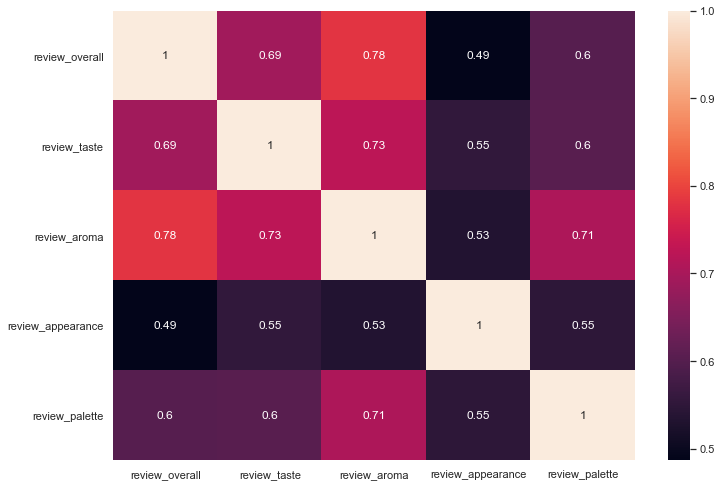

In [169]:
rating = df[['review_overall','review_taste','review_aroma','review_appearance','review_palette']]

corrMatrix = rating.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Highest Correlation exists between Ovrall Score & aroma then overall & taste then  overall+palette then overall+appearance

It seems to be the order Aroma> Taste > Pallete > Appearance

Approach 2- Can also apply a simple regressor to select feature importance order from above

In [184]:


train=rating.drop(['review_overall'],axis=1)
test=rating[['review_overall']]

X_train, X_test, y_train, y_test = train_test_split(train,test, test_size = 0.20, random_state = 42)



dt = DecisionTreeRegressor(random_state = 42,max_depth=4, max_features='auto')

dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=42)

In [187]:

y_pred=dt.predict(X_test)

In [188]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.32002068214063545
Mean Squared Error: 0.1785704841100723
Root Mean Squared Error: 0.4225760098610335


In [189]:

imp=dt.feature_importances_
names=X_train.columns.values

imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)
df_2["cum_sum"] = df_2.importance.cumsum()
df_2["cum_per"] = 100*df_2.cum_sum/df_2.importance.sum()
df_2

,Variable,importance,cum_sum,cum_per
0,review_aroma,0.955434,0.955434,95.543376
1,review_taste,0.044566,1.000000,100.000000
2,review_appearance,0.000000,1.000000,100.000000
3,review_palette,0.000000,1.000000,100.000000


From here we can see on the basis of feature importance that Aroma & Taste are important ones impacting Overall Score

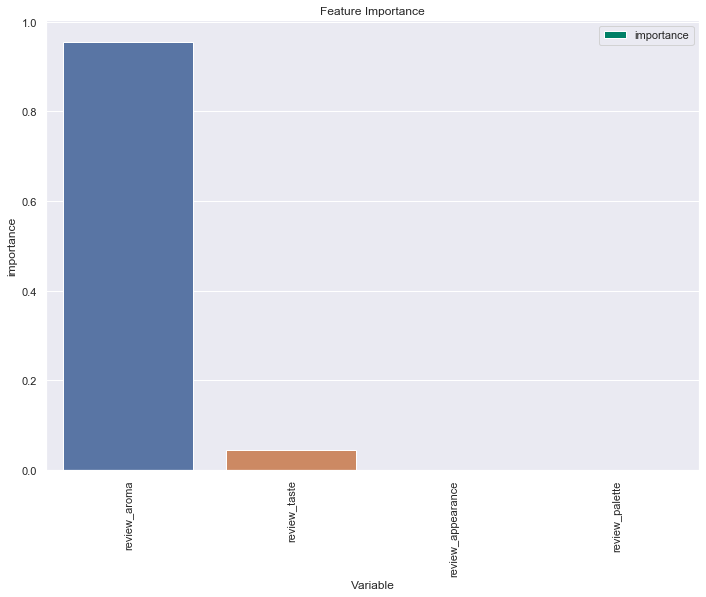

In [335]:
df_2[['Variable','importance']].plot(kind='bar', \
               title='Feature Importance', \
               colormap='summer',  )

sns.barplot(x = 'Variable',
            y = 'importance',
            data = df_2)
 
# Show the plot
plt.show()


In [191]:
from sklearn.tree import export_graphviz
# Export as dot file

export_graphviz(dt, out_file='tree1.dot', 
                feature_names = X_test.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

!dot -Tpng tree1.dot -o tree1.png -Gdpi=600

from IPython.display import Image
Image(filename = 'tree1.png')



# 4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

We are aware from before analysis that on an average we receive 12 reviews per beer
lly we can see a user gives on an average 12 reviews

So we will be working on the subset of data where beers have more than 12 reviews and users also have given more than 12 reviews so that it makes more sense to recommend beers basis that info

In [265]:
# Avg reviews per beer
(review_per_beer['Reviews_count'].mean(),review_per_beer['Reviews_count'].median() )

(11.070247414911877, 2.0)

In [266]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
Review_datetime        object
Review_Year             int64
dtype: object

In [267]:
# Avg reviews given bu User

review_per_user=df.groupby(['Review_Year','review_profileName'],as_index=False).agg({'review_overall':'count'})
review_per_user.columns=['Review_Year','review_profileName','Reviews_count']
(review_per_user['Reviews_count'].mean(),review_per_user['Reviews_count'].median() )

(12.976856623963089, 3.0)

In [268]:
# Filtering beer having more thann 12 reviews & beer having more than 12 reviews

beer_gt12_rev=list(review_per_beer[review_per_beer['Reviews_count']>12]['beer_name'].unique())
user_gt12_rev=list(review_per_user[review_per_user['Reviews_count']>12]['review_profileName'].unique())

data_from_choose=df[(df['beer_name'].isin(beer_gt12_rev)) & (df['review_profileName'].isin(user_gt12_rev))]

Recommending beer depend upon the preference of a user, 

Considering Overall grouping average of Aroma, taste, apperance, palette for reaching the conclusion
If use has preference for aroma & appearancethen they will like beer that score highly in the review_aroma and review_appearance variables.

Along with the average we can keep in mind the standard deviation as well. It will help in generalizing.

In [284]:
def pop_std(x):
    return x.std(ddof=0)


In [295]:
data_from_choose=df.groupby(['beer_style','beer_name'],as_index=False).agg({'review_taste':['mean',pop_std],
                                                                            'review_aroma':['mean',pop_std],
                                                                            'review_appearance':['mean',pop_std],
                                                                            'review_palette':['mean',pop_std],
                                                                            'review_overall':['mean',pop_std]
                                                                           })

data_from_choose.head()
data_from_choose['Total_Avg']=data_from_choose[[('review_taste','mean'),
                                                ('review_aroma','mean'),
                                                ('review_appearance','mean'),
                                                ('review_palette','mean')]].mean(axis=1)

In [297]:
data_from_choose.sort_values(('Total_Avg'),ascending=False).head(10)

beer_style  \
                                        
8187          Belgian Strong Pale Ale   
1506              American Barleywine   
1463              American Barleywine   
17224                     Schwarzbier   
4641          American Pale Ale (APA)   
3566                     American IPA   
15302              Milk / Sweet Stout   
1550              American Barleywine   
17524                    Scottish Ale   
2642   American Double / Imperial IPA   

                                            beer_name review_taste          \
                                                              mean pop_std   
8187                                Edsten Triple-Wit          5.0     0.0   
1506                                        Isosceles          5.0     0.0   
1463                       Date Night With Jumbo Love          5.0     0.0   
17224                              Rogue Black Brutal          5.0     0.0   
4641   Great Lakes Truth Justice And The American Ale          5.0     0.0   
3566                               Fritzkrieg Hop IPA          5.0     0.0   
15302                            Bourbon Barrel Stout          5.0     0.0   
1550                           Old Gander Barley Wine          5.0     0.0   
17524                      Goodes Highland Scotch Ale          5.0     0.0   
2642                                     Geronimo IPA          5.0     0.0   

      review_aroma         review_appearance         review_palette          \
              mean pop_std              mean pop_std           mean pop_std   
8187           5.0     0.0               5.0     0.0            5.0     0.0   
1506           5.0     0.0               5.0     0.0            5.0     0.0   
1463           5.0     0.0               5.0     0.0            5.0     0.0   
17224          5.0     0.0               5.0     0.0            5.0     0.0   
4641           5.0     0.0               5.0     0.0            5.0     0.0   
3566           5.0     0.0               5.0     0.0            5.0     0.0   
15302          5.0     0.0               5.0     0.0            5.0     0.0   
1550           5.0     0.0               5.0     0.0            5.0     0.0   
17524          5.0     0.0               5.0     0.0            5.0     0.0   
2642           5.0     0.0               4.5     0.0            5.0     0.0   

      review_overall         Total_Avg  
                mean pop_std            
8187             5.0     0.0     5.000  
1506             4.5     0.0     5.000  
1463             5.0     0.0     5.000  
17224            5.0     0.0     5.000  
4641             5.0     0.0     5.000  
3566             5.0     0.0     5.000  
15302            5.0     0.0     5.000  
1550             5.0     0.0     5.000  
17524            5.0     0.0     5.000  
2642             5.0     0.0     4.875

Also we have ranked top beers in different beer styles basis the avaerage scores in aroma, palette, appearance, taste

If a particular beer style is a preference then top 3 beers from that category can be picked up.

In [298]:
data_from_choose["rank"] = data_from_choose.groupby(['beer_style','beer_name'])["Total_Avg"].rank("dense", ascending=False)

In [299]:
data_from_choose.head()

beer_style                    beer_name review_taste           review_aroma  \
                                                  mean   pop_std         mean   
0    Altbier  "Nein Toll Bier" German Alt        3.500  0.000000         3.00   
1    Altbier  'Sconnie Rustic Trail Amber        2.250  0.250000         2.25   
2    Altbier          9303 German Red Ale        3.375  0.544862         3.75   
3    Altbier                     ALTitude        4.250  0.250000         4.00   
4    Altbier             Abita Select Alt        3.900  0.374166         3.60   

            review_appearance           review_palette            \
    pop_std              mean   pop_std           mean   pop_std   
0  0.000000            3.5000  0.000000         4.0000  0.000000   
1  0.750000            3.0000  0.000000         3.2500  0.250000   
2  0.500000            3.6875  0.496078         3.4375  0.390312   
3  0.000000            4.0000  0.500000         3.7500  0.250000   
4  0.374166            3.6000  0.374166         3.5000  0.316228   

  review_overall           Total_Avg rank  
            mean   pop_std                 
0         4.0000  0.000000    3.5000  1.0  
1         2.2500  0.750000    2.6875  1.0  
2         3.6875  0.496078    3.5625  1.0  
3         4.0000  0.000000    4.0000  1.0  
4         3.9000  0.374166    3.6500  1.0

# 5.	Which Beer style seems to be the favorite based on reviews written by users? 

In [179]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Review_datetime,Review_Year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,16/02/2009 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,01/03/2009 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,01/03/2009 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,15/02/2009 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,30/12/2010 18:53:26,2010


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 15 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
Review_datetime       528870 non-null object
Review_Year           528870 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 60.5+ MB


Removing observations where review_text is blank

In [182]:
data_review_text=df[~df['review_text'].isnull()]

Perfoming sentiment analysis on the review_text available

In [180]:
from textblob import TextBlob, Word, Blobber

In [197]:
data_review_text.shape

(528751, 15)

In [195]:
 TextBlob(data_review_text['review_text'].iloc[0]).sentiment[0]

-0.09090909090909091

In [198]:
data_review_text['sentiment'] = data_review_text['review_text'].apply(lambda x: TextBlob(x).sentiment[0])
data_review_text.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Review_datetime,Review_Year,sentiment
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,16/02/2009 20:57:03,2009,-0.090909
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,01/03/2009 13:44:57,2009,0.147436
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,01/03/2009 14:10:04,2009,0.338333
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,15/02/2009 19:12:25,2009,0.362745
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,30/12/2010 18:53:26,2010,0.167143


Categorizing into positive, neutral & negative comment category

In [243]:
data_review_text['Review_Sentiment']=np.where(data_review_text['sentiment']<-0.5,'Negative',np.where(data_review_text['sentiment']>0.5,'Positive','Neutral'))


In [251]:
data_review_text_total_rev=data_review_text.groupby(['beer_style'],as_index=False).agg({'Review_Sentiment':'count'})
data_review_text_total_rev.columns=['beer_style','Total_rev']

data_review_text_pos=data_review_text[data_review_text['Review_Sentiment']=='Positive']

data_review_text_pos_rev=data_review_text_pos.groupby(['beer_style'],as_index=False).agg({'Review_Sentiment':'count'})
data_review_text_pos_rev.columns=['beer_style','Pos_rev']



Forming word cloud of beer names where the review sentiments are positive

In [252]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()




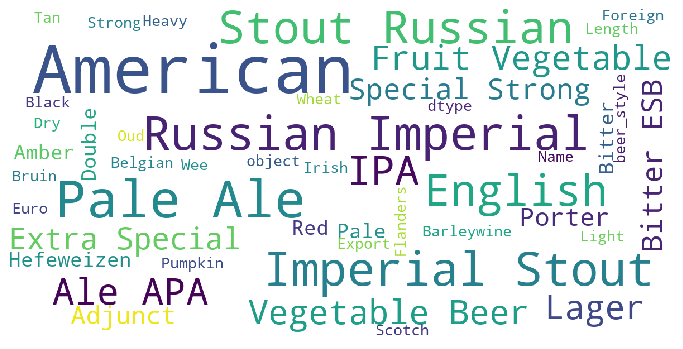

In [253]:
show_wordcloud(data_review_text_pos['beer_style'])

We can say American seems be be popular beer name among the positive reviews

# 6.	How does written review compare to overall review score for the beer styles?

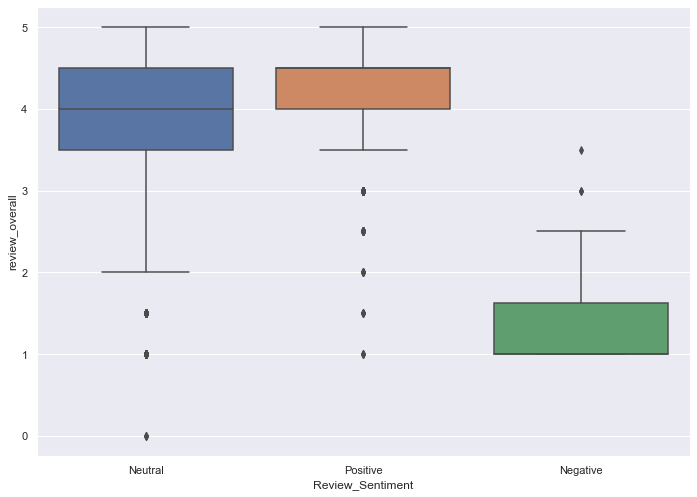

In [256]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(x="Review_Sentiment", y="review_overall", data=data_review_text)

Written review sentiments align with the overall scores as well. 
We can see that for positive reviews the overall review is at higher side, > 4
For negative reviews the overall review is at lower side 

Same can be seen at different beer styles level as well

# 7.	How do find similar beer drinkers by using written reviews only?   

Approach- 

On the basis of review, we will craete features like tf idf vctors and then we can apply unsupervised clustering.
Using K means we will be able to form clusters of reviews. Those clusters will be having similar behavious of user set.

In [209]:
data_review_text[['review_text']].head()

,review_text
0,A lot of foam. But a lot. In the smell some ba...
1,"Dark red color, light beige foam, average. In ..."
2,"Almost totally black. Beige foam, quite compac..."
3,"Golden yellow color. White, compact foam, quit..."
4,"According to the website, the style for the Ca..."


Subsetting users who has given enough reviews to apply the analysis on.

Considering user data who have given atleast 30 reviews.
also beers having atleast 30 reviews corresponding to them

In [320]:
user_gt30_rev=list(review_per_user[review_per_user['Reviews_count']>30]['review_profileName'].unique())
beer_gt30_rev=list(review_per_beer[review_per_beer['Reviews_count']>30]['beer_name'].unique())

data_review_text1=data_review_text[(data_review_text['review_profileName'].isin(user_gt30_rev)) & (data_review_text['beer_name'].isin(beer_gt30_rev))]

In [321]:
data_review_text1.shape

(285750, 17)

In [316]:
# Pre processing of text review
import spacy
nlp = spacy.load('en_core_web_sm')


# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

    return ' '.join(a_lemmas)




def spell(txt):
    '''spell correction'''
    tb = TextBlob(txt)
    return tb.correct().raw

data_review_text1['review_text']=data_review_text1['review_text'].str.lower().str.strip()

data_review_text1['review_text'] = data_review_text1['review_text'].map(spell)

data_review_text1['review_text'] = data_review_text1['review_text'].apply(preprocess)

    




In [322]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training data: tfidf_train 
tfidf_data_review_text = tfidf_vectorizer.fit_transform(data_review_text1['review_text'])


In [323]:
tfidf_data_review_text

<285750x103956 sparse matrix of type '<class 'numpy.float64'>'
	with 16481000 stored elements in Compressed Sparse Row format>

Applying Clustering to group similar behaviour users together

Finding the optimal number of clusters

In [327]:
# Sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(tfidf_data_review_text)
#     Sum_of_squared_distances.append(km.inertia_)
    
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [329]:
km = KMeans(5)
kmresult = km.fit(tfidf_data_review_text).predict(tfidf_data_review_text)



In [330]:
data_review_text1['kmresult']=kmresult

In [336]:
data_review_text1.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Review_datetime,Review_Year,sentiment,Review_Sentiment,kmresult
59,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.5,4.0,4.0,NJpadreFan,4.0,caldera- pale ale picked up at grape & gourmet...,1251327677,26/08/2009 23:01:17,2009,0.229583,Neutral,1
60,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.0,2.5,3.5,vacax,2.5,12 oz. can poured into a pint glass. i really ...,1250928902,22/08/2009 08:15:02,2009,0.161063,Neutral,1
63,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),4.0,3.5,4.5,4.0,mdagnew,4.0,355ml can bought from beersofeurope.com... pou...,1249556277,06/08/2009 10:57:57,2009,0.244741,Neutral,3
64,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),4.5,3.5,4.0,4.0,mikesgroove,4.0,i received this one in a bif recently and it w...,1249347819,04/08/2009 01:03:39,2009,0.253337,Neutral,1
65,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),4.0,3.5,4.0,4.0,hdofu,4.0,orangeish with a peach head. smell was hoppy. ...,1248223105,22/07/2009 00:38:25,2009,0.286111,Neutral,0


In [342]:

similar_user=data_review_text1[['kmresult','review_profileName']].drop_duplicates()

similar_user_count=similar_user.groupby(['kmresult'],as_index=False).agg({'review_profileName':'count'})
similar_user_count.columns=['Cluster','Users_count']
similar_user_count

,Cluster,Users_count
0,0,2521
1,1,2476
2,2,1332
3,3,2496
4,4,2487


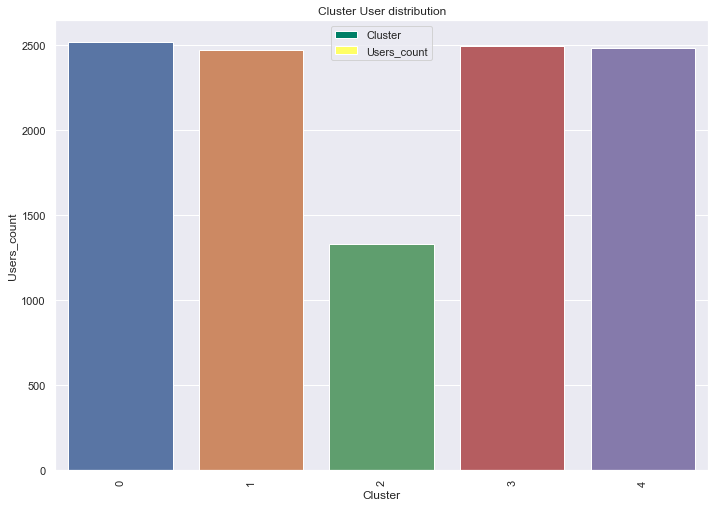

In [343]:
similar_user_count[['Cluster','Users_count']].plot(kind='bar', \
               title='Cluster User distribution', \
               colormap='summer',  )

sns.barplot(x = 'Cluster',
            y = 'Users_count',
            data = similar_user_count)
 
# Show the plot
plt.show()
